In [21]:
import pandas as pd
import os
#DATA_DIR = './aggregation_mechanism_graph'
#DATA_DIR = './gat_hybrid_baseline/2hp'
#DATA_DIR = './gat_hybrid_baseline/5hp'
DATA_DIR = './gat_hybrid_baseline/20hp'
#DATA_DIR = './gat_hybrid_baseline_2blue/2hp'
#DATA_DIR = './gat_hybrid_baseline_2blue/5hp'
#DATA_DIR = './gat_hybrid_baseline_2blue/20hp'
csvs = sorted(os.listdir(DATA_DIR))
print(csvs)
data = []
labels = []
for csv in csvs:
    if csv[-4:] == '.csv':
        data.append(pd.read_csv(os.path.join(DATA_DIR, csv)))
        labels.append(csv[:-4])

['Baseline; 20HP.csv', 'GAT; 20HP.csv', 'Hybrid; 20HP.csv']


In [2]:
def reorder(arr, ordering=None):
    if not ordering: return arr
    n_arr = [None] * len(arr)
    for i in range(len(arr)):
        n_arr[i] = arr[ordering[i]]
    return n_arr

# ordering = [1, 2, 0, 4, 5, 3] # for aggregation graph
ordering = None
data = reorder(data, ordering)
labels = reorder(labels, ordering)

In [9]:
len(labels)

3

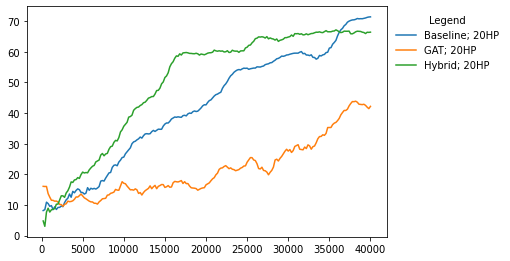

In [22]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator,FormatStrFormatter,MaxNLocator
import numpy as np

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'Arial'

mpl.rcParams['lines.marker']  #None
mpl.rcParams['lines.markersize']  #6.0
mpl.rcParams['lines.linewidth']   # 1.5
mpl.rcParams['axes.prop_cycle']

mpl.colors.to_rgb('#1f77b4')

fig = plt.figure(figsize=(10,4))
ax = fig.add_axes([0.1,0.1,0.5,0.8])

axes = [ax.plot(d['Step'].values, d['Value'].values, marker='') for d in data]
handles = [axis[0] for axis in axes]

ax.legend(handles=handles,labels=labels,loc='upper left',bbox_to_anchor=(1,1),
          title='Legend',frameon=False)
plt.show()